**Exercise 11.21**.  In Chapters 5–8, we investigated an IMA(1,1) model for the logarithms of monthly oil prices.  Exhibit 8.3 on page 178 suggested that there may be several outliers in this series.  Investigate the IMA(1,1) model for this series for outliers using the techniques developed in this chapter.  Be sure to compare your results with those obtained earlier that ignored the outliers. The data are in the file named `oil.price`.

**Solution**.

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Y = np.log(np.array(pd.read_csv('../data/oil.price.dat')['oil.price']))

In [3]:
model_m1 = ARIMA(Y, order=(0, 1, 1)).fit()
print(model_m1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  241
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 260.291
Date:                Thu, 21 May 2020   AIC                           -516.583
Time:                        18:53:59   BIC                           -509.622
Sample:                             0   HQIC                          -513.778
                                - 241                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2956      0.054      5.445      0.000       0.189       0.402
sigma2         0.0067      0.000     16.403      0.000       0.006       0.007
Ljung-Box (Q):                       46.05   Jarque-

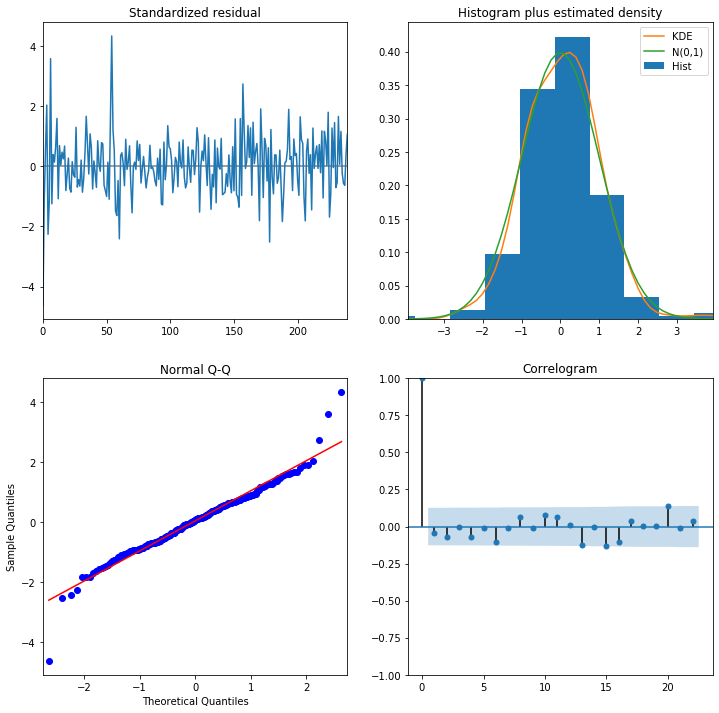

In [4]:
model_m1.plot_diagnostics(figsize=(12, 12), lags=22)
plt.show()

In [5]:
%%capture
%run outlier_detection.py

In [6]:
lambda2, ind = detectAO(model_m1)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda2: ', lambda2)
else:
    print("No AO detected")

indexes:  [ 1  7 55]
lambda2:  [-4.32698011  4.00796789  4.07621997]


In [7]:
lambda1, ind = detectIO(model_m1)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda1: ', lambda1)
else:
    print("No IO detected")

indexes:  [ 1  7 55]
lambda1:  [-4.87653227  3.77442844  4.57099917]


We will set IO outliers on index 55, and an AO outlier on indexes 1 and 7.

In [8]:
xreg = np.zeros((len(Y), 3))
xreg[55, 0] = 1
xreg[1:, 1] = 1
xreg[7:, 2] = 1

In [9]:
model_m2 = ARIMA(Y, order=(0, 1, 1), exog=xreg).fit()
print(model_m2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  241
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 279.177
Date:                Thu, 21 May 2020   AIC                           -548.355
Time:                        18:54:01   BIC                           -530.952
Sample:                             0   HQIC                          -541.343
                                - 241                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0886      0.015      5.921      0.000       0.059       0.118
x2            -0.3389      0.080     -4.247      0.000      -0.495      -0.183
x3             0.2975      0.949      0.314      0.7

The coefficient for the outlier at index 7 is not significant, so we will drop it.

In [10]:
xreg = np.zeros((len(Y), 2))
xreg[55, 0] = 1
xreg[1:, 1] = 1

In [11]:
model_m3 = ARIMA(Y, order=(0, 1, 1), exog=xreg).fit()
print(model_m3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  241
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 271.120
Date:                Thu, 21 May 2020   AIC                           -534.239
Time:                        18:54:01   BIC                           -520.317
Sample:                             0   HQIC                          -528.630
                                - 241                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0896      0.016      5.686      0.000       0.059       0.120
x2            -0.3447      0.094     -3.682      0.000      -0.528      -0.161
ma.L1          0.2580      0.052      4.957      0.0

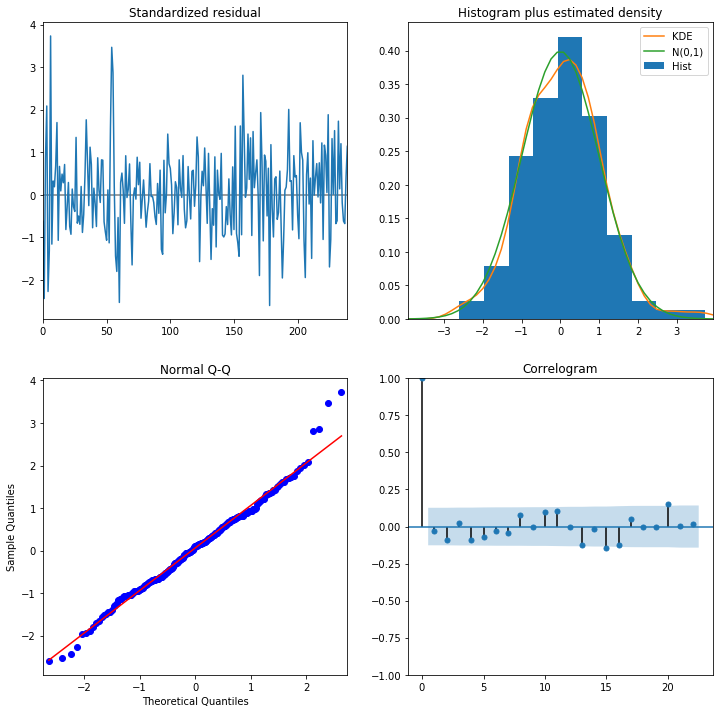

In [12]:
model_m3.plot_diagnostics(figsize=(12, 12), lags=22)
plt.show()

In [13]:
lambda2, ind = detectAO(model_m3)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda2: ', lambda2)
else:
    print("No AO detected")

indexes:  7
lambda2:  4.007129691809666


In [14]:
lambda1, ind = detectIO(model_m3)

if ind.size > 0:
    print('indexes: ', ind)
    print('lambda1: ', lambda1)
else:
    print("No IO detected")

indexes:  7
lambda1:  3.821754285786545


No new outliers detected -- so we will keep this model.  Note that the addition of the outliers causes a meaningful change to the estimated value of $\theta_1$.